In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [27]:
import string
from nltk.corpus import stopwords

def textPreprocess(data):
    #Remove Punctuations
    removePunctuation = [ char for char in data if char not in string.punctuation ]
    sentenceWithoutPunctuations = ''.join(removePunctuation)
    #Convert Sentence to words
    words = sentenceWithoutPunctuations.split(" ")
    #Remove Stopwords
    removeStopwords = [ word for word in words if word.lower() not in stopwords.words('english') ]
    return removeStopwords

In [3]:
data = pd.read_csv('smsspamcollection/SMSSpamCollection' , sep="\t", names=['label','message'])

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
label      5572 non-null object
message    5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


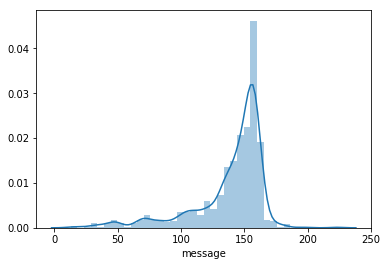

In [19]:
sns.distplot(data[data.label == 'spam']['message'].apply(len))

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


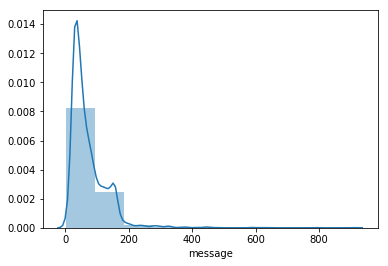

In [25]:
sns.distplot(data[data.label == 'ham']['message'].apply(len),bins=10)

In [28]:
#BOW Creation --- Sklearn --- Accept your textPreprocessing function
from sklearn.feature_extraction.text import CountVectorizer
wordVector = CountVectorizer(analyzer=textPreprocess)
finalWordVector = wordVector.fit(data['message'])

In [31]:
finalWordVector.vocabulary_

{'Go': 2061,
 'jurong': 7556,
 'point': 8919,
 'crazy': 5770,
 'Available': 1111,
 'bugis': 5219,
 'n': 8338,
 'great': 6938,
 'world': 11165,
 'la': 7669,
 'e': 6218,
 'buffet': 5218,
 'Cine': 1484,
 'got': 6907,
 'amore': 4654,
 'wat': 10967,
 'Ok': 3065,
 'lar': 7702,
 'Joking': 2452,
 'wif': 11074,
 'u': 10700,
 'oni': 8592,
 'Free': 1942,
 'entry': 6332,
 '2': 424,
 'wkly': 11125,
 'comp': 5620,
 'win': 11086,
 'FA': 1834,
 'Cup': 1552,
 'final': 6558,
 'tkts': 10514,
 '21st': 444,
 'May': 2805,
 '2005': 431,
 'Text': 3954,
 '87121': 872,
 'receive': 9254,
 'questionstd': 9161,
 'txt': 10688,
 'rateTCs': 9202,
 'apply': 4732,
 '08452810075over18s': 74,
 'U': 4069,
 'dun': 6205,
 'say': 9556,
 'early': 6223,
 'hor': 7187,
 'c': 5262,
 'already': 4630,
 'Nah': 2949,
 'dont': 6124,
 'think': 10435,
 'goes': 6878,
 'usf': 10801,
 'lives': 7843,
 'around': 4778,
 'though': 10452,
 'FreeMsg': 1944,
 'Hey': 2223,
 'darling': 5865,
 '3': 544,
 'weeks': 11013,
 'word': 11152,
 'back': 4894

In [29]:
bow = finalWordVector.transform(data['message'])

In [32]:
#TD-IDF
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer().fit(bow)
featureData = tfidf.transform(bow)

In [33]:
featureData

<5572x11427 sparse matrix of type '<class 'numpy.float64'>'
	with 51591 stored elements in Compressed Sparse Row format>

In [34]:
#Train the model
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(featureData,data['label'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [35]:
model.score(featureData,data['label'])

0.9791816223977028

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(data['label'],model.predict(featureData))

In [37]:
cm

array([[4825,    0],
       [ 116,  631]], dtype=int64)

In [38]:
from sklearn.metrics import classification_report
print(classification_report(data['label'],model.predict(featureData)))

             precision    recall  f1-score   support

        ham       0.98      1.00      0.99      4825
       spam       1.00      0.84      0.92       747

avg / total       0.98      0.98      0.98      5572



In [41]:
#User input
inputSMS = input("Enter SMS to classify: ")
step1 = textPreprocess(inputSMS)
step2 = finalWordVector.transform(step1)
step3 = tfidf.transform(step2)
predict = model.predict(step3)
print("Given message is ",predict[0])

Enter SMS to classify: Win Lottery Guaranteed
Given message is  spam
